# Task 1 

## Data Cleaning & Preparation

    Clean a raw dataset by
    handling missing values,
    duplicates, and incorrect data.
    
    Key Requirements:
    • Identify missing or nullvalues
    • Remove duplicates
    • Correct data formats (dates, numbers, text)
    
    Key Skills:
    
    Data cleaning, Excel or Python basics, data preparation

## Import Libraries and DataSet

In [4]:
import pandas as pd
import numpy as np
import os

In [10]:
path = r"C:\Dataset\Online-Store-Orders.xlsx"

In [13]:
df = pd.read_excel(path)

In [14]:
df.head()

,OrderID,Date,CustomerID,Product,Quantity,UnitPrice,ShippingAddress,PaymentMethod,OrderStatus,TrackingNumber,ItemsInCart,CouponCode,ReferralSource,TotalPrice
0,ORD200000,2023-01-04,C72649,Monitor,5,570.62,928 Main St,Debit Card,Shipped,TRK37947903,7,SAVE10,Instagram,2853.10
1,ORD200001,2024-08-23,C75739,Phone,2,151.35,823 Main St,Online,Shipped,TRK91186779,3,SAVE10,Referral,302.70
2,ORD200002,2024-02-27,C81728,Tablet,5,550.68,512 Main St,Credit Card,Cancelled,TRK42903982,8,FREESHIP,Email,2753.40
3,ORD200003,2023-10-15,C33540,Chair,1,273.19,275 Main St,Debit Card,Returned,TRK62788070,5,SAVE10,Facebook,273.19
4,ORD200004,2025-05-08,C81840,Printer,4,626.01,668 Main St,Online,Delivered,TRK29241424,8,SAVE10,Email,2504.04


## Number of total Rows and Columns

In [24]:
df.shape

(1200, 14)

In [25]:
df.size

16800

In [26]:
df.count()

OrderID            1200
Date               1200
CustomerID         1200
Product            1200
Quantity           1200
UnitPrice          1200
ShippingAddress    1200
PaymentMethod      1200
OrderStatus        1200
TrackingNumber     1200
ItemsInCart        1200
CouponCode          891
ReferralSource     1200
TotalPrice         1200
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          1200 non-null   object        
 1   Date             1200 non-null   datetime64[ns]
 2   CustomerID       1200 non-null   object        
 3   Product          1200 non-null   object        
 4   Quantity         1200 non-null   int64         
 5   UnitPrice        1200 non-null   float64       
 6   ShippingAddress  1200 non-null   object        
 7   PaymentMethod    1200 non-null   object        
 8   OrderStatus      1200 non-null   object        
 9   TrackingNumber   1200 non-null   object        
 10  ItemsInCart      1200 non-null   int64         
 11  CouponCode       891 non-null    object        
 12  ReferralSource   1200 non-null   object        
 13  TotalPrice       1200 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(

## Checking for Duplicated Rows

In [33]:
df.duplicated().sum()

0

## Checking for Null Values

In [19]:
df.isnull().sum()

OrderID              0
Date                 0
CustomerID           0
Product              0
Quantity             0
UnitPrice            0
ShippingAddress      0
PaymentMethod        0
OrderStatus          0
TrackingNumber       0
ItemsInCart          0
CouponCode         309
ReferralSource       0
TotalPrice           0
dtype: int64

## Handling Null Values

In [41]:
df['CouponCode'] = df['CouponCode'].fillna('No Coupon') # Filled Null Values.

In [42]:
df['CouponCode'].isna().sum()

0

## Validation of Data

In [43]:
df['CalculatedTotal'] = df['Quantity'] * df['UnitPrice']

In [44]:
(df['CalculatedTotal'] == df['TotalPrice']).value_counts()

True     1093
False     107
Name: count, dtype: int64

In [47]:
df['PriceMismatch'] = df['CalculatedTotal'] != df['TotalPrice']

In [48]:
df['PriceMismatch'].value_counts()

PriceMismatch
False    1093
True      107
Name: count, dtype: int64

In [45]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

In [46]:
df[['Date', 'Year', 'Month', 'Day']].head()


,Date,Year,Month,Day
0,2023-01-04,2023,1,4
1,2024-08-23,2024,8,23
2,2024-02-27,2024,2,27
3,2023-10-15,2023,10,15
4,2025-05-08,2025,5,8


In [49]:
df.head()

,OrderID,Date,CustomerID,Product,Quantity,UnitPrice,ShippingAddress,PaymentMethod,OrderStatus,TrackingNumber,ItemsInCart,CouponCode,ReferralSource,TotalPrice,CalculatedTotal,Month,Year,Day,PriceMismatch
0,ORD200000,2023-01-04,C72649,Monitor,5,570.62,928 Main St,Debit Card,Shipped,TRK37947903,7,SAVE10,Instagram,2853.10,2853.10,1,2023,4,False
1,ORD200001,2024-08-23,C75739,Phone,2,151.35,823 Main St,Online,Shipped,TRK91186779,3,SAVE10,Referral,302.70,302.70,8,2024,23,False
2,ORD200002,2024-02-27,C81728,Tablet,5,550.68,512 Main St,Credit Card,Cancelled,TRK42903982,8,FREESHIP,Email,2753.40,2753.40,2,2024,27,True
3,ORD200003,2023-10-15,C33540,Chair,1,273.19,275 Main St,Debit Card,Returned,TRK62788070,5,SAVE10,Facebook,273.19,273.19,10,2023,15,False
4,ORD200004,2025-05-08,C81840,Printer,4,626.01,668 Main St,Online,Delivered,TRK29241424,8,SAVE10,Email,2504.04,2504.04,5,2025,8,False


# Task 2 

## Exploratory Data Analysis

## Overview - TOP KPIs

In [58]:
total_revenue = df['TotalPrice'].sum()

In [59]:
total_orders = df['OrderID'].nunique()

In [60]:
average_order_value = df['TotalPrice'].mean()

In [111]:
median_order_value = df['TotalPrice'].median()

In [61]:
total_quantity = df['Quantity'].sum()

In [113]:
print('Total_revenue =',total_revenue)
print('Total_orders =',total_orders)
print('Average_order_value =',average_order_value)
print('Median_order_value =',median_order_value)
print('Total_quantity =',total_quantity)

Total_revenue = 1264761.96
Total_orders = 1200
Average_order_value = 1053.9683
Median_order_value = 823.615
Total_quantity = 3535


### Monthly Revenue

In [70]:
monthly_sales = df.groupby('Month')['TotalPrice'].sum().reset_index()

In [84]:
print(monthly_sales)

    Month  TotalPrice
0       1   124313.23
1       2   112344.78
2       3   123840.93
3       4   109186.05
4       5   135142.59
5       6   170616.13
6       7    85784.64
7       8    86343.21
8       9    69321.65
9      10    89834.82
10     11    75493.43
11     12    82540.50


In [91]:
min_revenue = monthly_sales['TotalPrice'].min()
max_revenue = monthly_sales['TotalPrice'].max()

In [92]:
month_max_revenue = monthly_sales.loc[monthly_sales['TotalPrice'].idxmax(), 'Month']
month_max_revenue , max_revenue

(6, 170616.13)

In [93]:
month_min_revenue = monthly_sales.loc[monthly_sales['TotalPrice'].idxmin(), 'Month']
month_min_revenue , min_revenue

(9, 69321.65)

### Monthly Orders

In [71]:
monthly_orders = df.groupby('Month')['OrderID'].count().reset_index()

In [87]:
month_max_orders = monthly_orders.loc[monthly_orders['OrderID'].idxmax(), 'Month']
month_min_orders = monthly_orders.loc[monthly_orders['OrderID'].idxmin(), 'Month']

month_min_orders, month_max_orders

(9, 6)

In [75]:
print(monthly_orders)

    Month  OrderID
0       1      106
1       2      106
2       3      128
3       4      113
4       5      120
5       6      147
6       7       87
7       8       79
8       9       73
9      10       78
10     11       76
11     12       87


In [94]:
monthly_revenue = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
monthly_revenue.head()

,Year,Month,TotalPrice
0,2023,1,56685.75
1,2023,2,40117.66
2,2023,3,48609.37
3,2023,4,27751.71
4,2023,5,63836.84


## Visualization

In [95]:
import matplotlib.pyplot as plt

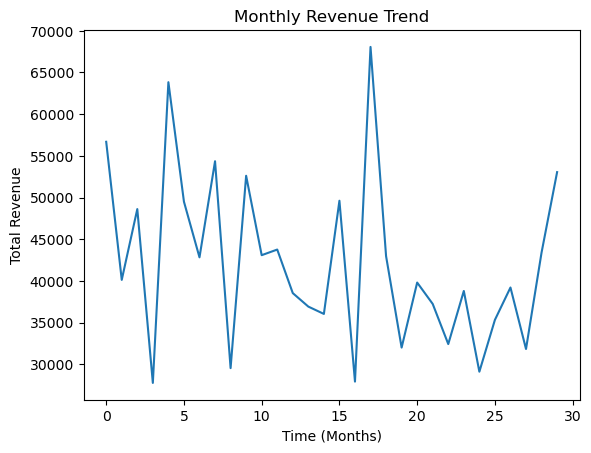

In [96]:
plt.figure()

plt.plot(monthly_revenue['TotalPrice'])
plt.title('Monthly Revenue Trend')
plt.xlabel('Time (Months)')
plt.ylabel('Total Revenue')
plt.show()

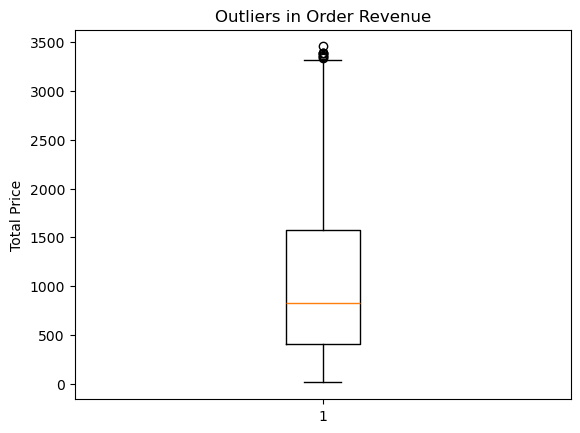

In [97]:
plt.figure()
plt.boxplot(df['TotalPrice'])
plt.title('Outliers in Order Revenue')
plt.ylabel('Total Price')
plt.show()

# Task 3

## SQL - Data Analysis

### QUERY 1: SELECT

In [99]:
df[['OrderID', 'Product', 'Quantity', 'TotalPrice']].head()

,OrderID,Product,Quantity,TotalPrice
0,ORD200000,Monitor,5,2853.10
1,ORD200001,Phone,2,302.70
2,ORD200002,Tablet,5,2753.40
3,ORD200003,Chair,1,273.19
4,ORD200004,Printer,4,2504.04


### QUERY 2: WHERE

In [100]:
delivered_orders = df[df['OrderStatus'] == 'Delivered']
delivered_orders.head()

,OrderID,Date,CustomerID,Product,Quantity,UnitPrice,ShippingAddress,PaymentMethod,OrderStatus,TrackingNumber,ItemsInCart,CouponCode,ReferralSource,TotalPrice,CalculatedTotal,Month,Year,Day,PriceMismatch
4,ORD200004,2025-05-08,C81840,Printer,4,626.01,668 Main St,Online,Delivered,TRK29241424,8,SAVE10,Email,2504.04,2504.04,5,2025,8,False
15,ORD200015,2023-07-17,C39416,Printer,1,473.96,942 Main St,Cash,Delivered,TRK54930938,3,No Coupon,Google,473.96,473.96,7,2023,17,False
21,ORD200021,2024-11-17,C99023,Monitor,4,342.95,569 Main St,Cash,Delivered,TRK52646983,6,No Coupon,Google,1371.80,1371.80,11,2024,17,False
24,ORD200024,2024-10-30,C17470,Laptop,2,230.95,956 Main St,Online,Delivered,TRK28775057,3,WINTER15,Referral,461.90,461.90,10,2024,30,False
25,ORD200025,2024-07-24,C42577,Monitor,1,399.98,709 Main St,Debit Card,Delivered,TRK69423327,3,WINTER15,Email,399.98,399.98,7,2024,24,False


### QUERY 3: GROUP BY + COUNT

In [101]:
df.groupby('OrderStatus').size().reset_index(name='OrderCount')

,OrderStatus,OrderCount
0,Cancelled,250
1,Delivered,231
2,Pending,237
3,Returned,247
4,Shipped,235


### QUERY 4: GROUP BY + SUM

In [102]:
df.groupby('Product')['TotalPrice'].sum().reset_index(name='TotalRevenue')

,Product,TotalRevenue
0,Chair,195620.11
1,Desk,167459.93
2,Laptop,192126.56
3,Monitor,175651.41
4,Phone,151722.39
5,Printer,195612.61
6,Tablet,186568.95


### QUERY 5: GROUP BY + AVG + ORDER BY

In [103]:
df.groupby('PaymentMethod')['TotalPrice'] \
  .mean() \
  .reset_index(name='AverageOrderValue') \
  .sort_values(by='AverageOrderValue', ascending=False)

,PaymentMethod,AverageOrderValue
1,Credit Card,1127.553974
3,Gift Card,1070.973565
0,Cash,1056.041829
4,Online,1017.220698
2,Debit Card,1001.556810


# Task 4

## Data Visualization

# Monthly Revenue Trend (Line Chart)

<Figure size 640x480 with 0 Axes>

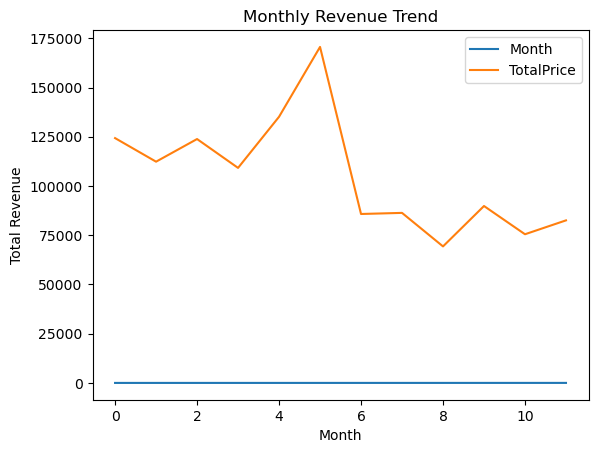

In [104]:
plt.figure()
monthly_sales.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

### Key Insights
#### 1. Revenue shows noticeable variation across months, indicating seasonal trends in sales.
#### 2. Certain months contribute significantly higher revenue, highlighting peak business periods.
#### 3. Understanding monthly trends can help with demand forecasting and inventory planning.

# Orders by Payment Method (Bar Chart)

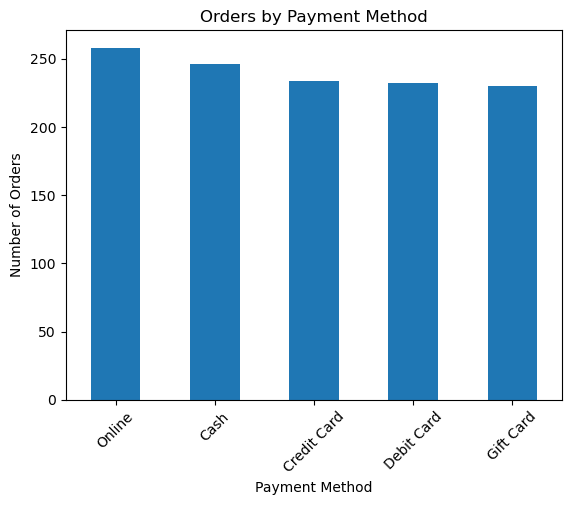

In [105]:
payment_counts = df['PaymentMethod'].value_counts()

plt.figure()
payment_counts.plot(kind='bar')
plt.title("Orders by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

## Key Insights
#### 1. The majority of orders are placed using Online, indicating a strong customer preference for this payment option.
#### 2. Alternative payment methods contribute a smaller share, suggesting potential opportunities to improve adoption through offers or incentives.
#### 3. Understanding payment preferences can help optimize checkout experience and payment partnerships.

# Top 5 Products by Revenue (Bar Chart)

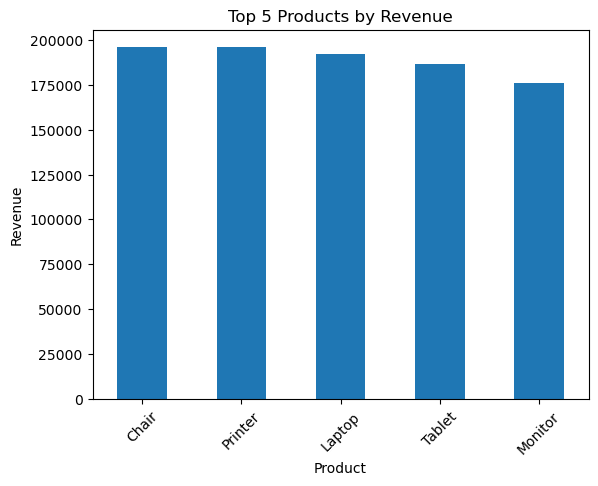

In [106]:
top_products = (df.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False).head(5))

plt.figure()
top_products.plot(kind='bar')
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

## Key Insights
#### 1. A small number of products contribute a large portion of total revenue.
#### 2. High-performing products can be prioritized for promotions and stock availability.
#### 3. This analysis helps identify key revenue drivers for the business.

# Order Status Distribution (Pie Chart)

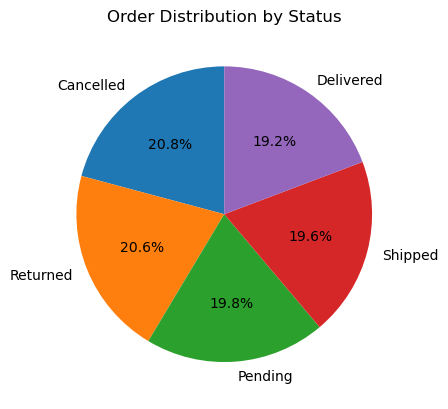

In [110]:
order_status_counts = df['OrderStatus'].value_counts()

plt.figure()
order_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Order Distribution by Status")
plt.ylabel("")
plt.show()

## Key Insights
#### 1. Most orders are successfully completed, indicating a stable order fulfillment process.
#### 2. A smaller share of cancelled or pending orders highlights areas for operational improvement.
#### 3. Monitoring order status helps assess service efficiency and customer satisfaction.

# Task 5

## Final Data Insights Report

### Overview

### Key Insights & Findings

#### 1. Overall Business Performance

#### 2. Monthly Revenue Trends

#### 3. Product Performance

#### 4. Order Status Distribution

#### Conclusion

#### Tools & Techniques Used